<a href="https://colab.research.google.com/github/asadali163/Time-Series-Experiments/blob/main/codebase/Auto_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget -O airline.csv https://lazyprogrammer.me/course_files/airline_passengers.csv

--2024-07-11 07:24:16--  https://lazyprogrammer.me/course_files/airline_passengers.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2036 (2.0K) [text/csv]
Saving to: ‘airline.csv’

airline.csv         100%[===================>]   1.99K  --.-KB/s    in 0s      

2024-07-11 07:24:16 (26.4 MB/s) - ‘airline.csv’ saved [2036/2036]



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 35.3 MB/s eta 0:00:00


In [ ]:
df = pd.read_csv('airline.csv', index_col='Month', parse_dates=True)
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [ ]:
df['LogPassengers'] = np.log(df['Passengers'])

In [ ]:
import pmdarima as pm

In [ ]:
N_test = 12
train = df.iloc[:-N_test]
test = df.iloc[-N_test:]

In [ ]:
model = pm.auto_arima(train['Passengers'], suppress_warnings=True, trace=True, seasonal=True, m=12)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=inf, Time=2.53 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1022.234, Time=0.04 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=906.857, Time=0.48 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=963.555, Time=0.44 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1192.711, Time=0.04 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=907.180, Time=0.10 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=908.543, Time=1.71 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=2.75 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=907.120, Time=0.62 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=3.72 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=1021.611, Time=0.36 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=906.396, Time=0.66 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AIC=906.075, Time=0.18 sec
 ARIMA(2,0,0)(0,1,1)[12] intercept   : AIC=906.713, Time=0.47 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(3, 0, 0)x(0, 1, 0, 12)   Log Likelihood                -447.843
Date:                            Thu, 11 Jul 2024   AIC                            905.686
Time:                                    07:31:10   BIC                            919.623
Sample:                                01-01-1949   HQIC                           911.346
                                     - 12-01-1959                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      5.5341      2.007      2.757      0.006       1.600       9.468
ar.L1          0.7049      0.095      7.393      0.000       0.518       0.892
ar.L2          0.2574      0.131      1.968      0.049       0.001       0.514
ar.L3         -0.1434      0.107     -1.338      0.181      -0.354       0.067
sigma2       101.0969     12.818      7.887      0.000      75.974     126.220
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.83
Prob(Q):                              0.96   Prob(JB):                         0.24
Heteroskedasticity (H):               1.41   Skew:                            -0.14
Prob(H) (two-sided):                  0.29   Kurtosis:                         3.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
pred, confint = model.predict(n_periods=N_test, return_conf_int=True)

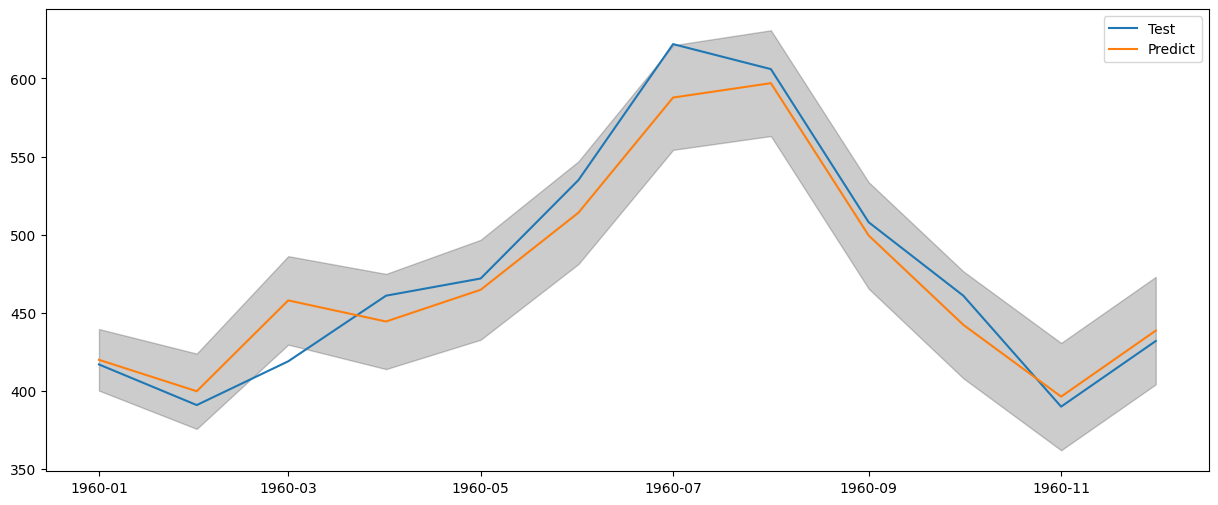

In [ ]:
fig, ax = plt.subplots(figsize=(15,6))
ax.plot(test.index, test['Passengers'], label='Test')
ax.plot(test.index, pred, label='Predict')
ax.fill_between(test.index, confint[:,0], confint[:,1], color='k', alpha=0.2)
ax.legend()
plt.show()

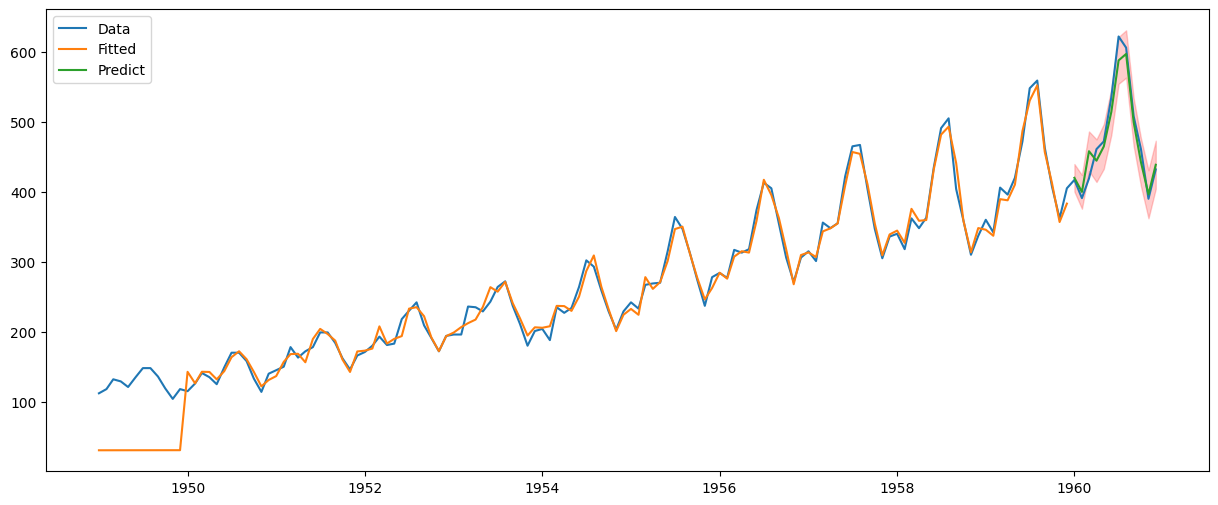

In [ ]:
## In sample prediction
train_pred = model.predict_in_sample(start=0, end=-1)

fig, ax = plt.subplots(figsize=(15,6))
ax.plot(df.index, df['Passengers'], label='Data')
ax.plot(train.index, train_pred, label='Fitted')
ax.plot(test.index, pred, label='Predict')
ax.fill_between(test.index, confint[:,0], confint[:,1], color='red', alpha=0.2)
ax.legend()
plt.show();

### Now let's check the Log Difference and see how it fit on log difference data instead of direct data

In [ ]:
logmodel = pm.auto_arima(train['LogPassengers'], suppress_warnings=True, trace=True, seasonal=True, m=12)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=-439.293, Time=7.00 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=-317.949, Time=0.23 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=-433.027, Time=2.73 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=-383.189, Time=1.90 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=-134.983, Time=0.05 sec
 ARIMA(2,0,2)(0,1,1)[12] intercept   : AIC=-444.326, Time=4.50 sec
 ARIMA(2,0,2)(0,1,0)[12] intercept   : AIC=-414.783, Time=3.42 sec
 ARIMA(2,0,2)(0,1,2)[12] intercept   : AIC=-442.328, Time=8.19 sec
 ARIMA(2,0,2)(1,1,0)[12] intercept   : AIC=-436.714, Time=2.10 sec
 ARIMA(2,0,2)(1,1,2)[12] intercept   : AIC=inf, Time=7.43 sec
 ARIMA(1,0,2)(0,1,1)[12] intercept   : AIC=-445.571, Time=1.92 sec
 ARIMA(1,0,2)(0,1,0)[12] intercept   : AIC=-414.732, Time=0.53 sec
 ARIMA(1,0,2)(1,1,1)[12] intercept   : AIC=-443.041, Time=2.32 sec
 ARIMA(1,0,2)(0,1,2)[12] intercept   : AIC=-443.327, Time=4.25 sec
 ARIMA(1,0,2)(1,1,0)[12]

In [ ]:
logmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  132
Model:             SARIMAX(2, 0, 0)x(0, 1, [1], 12)   Log Likelihood                 229.026
Date:                              Thu, 11 Jul 2024   AIC                           -448.052
Time:                                      07:43:40   BIC                           -434.114
Sample:                                  01-01-1949   HQIC                          -442.392
                                       - 12-01-1959                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0194      0.009      2.164      0.030       0.002       0.037
ar.L1          0.5992      0.083      7.251      0.000       0.437       0.761
ar.L2          0.2418      0.085      2.854      0.004       0.076       0.408
ma.S.L12      -0.5670      0.105     -5.413      0.000      -0.772      -0.362
sigma2         0.0012      0.000      8.188      0.000       0.001       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 6.13
Prob(Q):                              0.99   Prob(JB):                         0.05
Heteroskedasticity (H):               0.36   Skew:                             0.08
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
log_pred, log_confint = logmodel.predict(n_periods=N_test, return_conf_int=True)

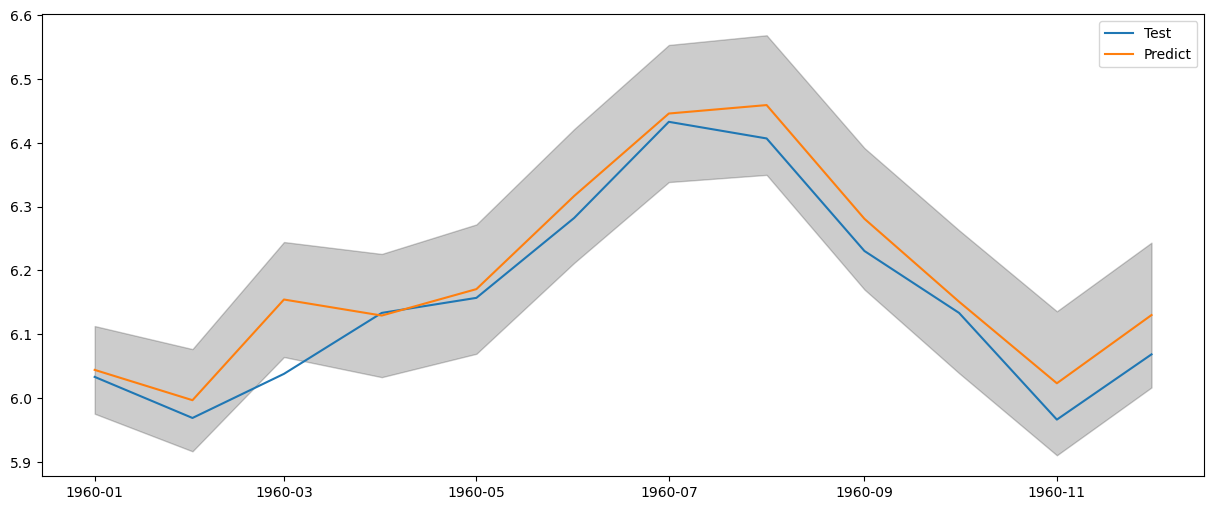

In [ ]:
fig, ax = plt.subplots(figsize=(15,6))
ax.plot(test.index, test['LogPassengers'], label='Test')
ax.plot(test.index, log_pred, label='Predict')
ax.fill_between(test.index, log_confint[:,0], log_confint[:,1], color='k', alpha=0.2)
ax.legend()
plt.show();

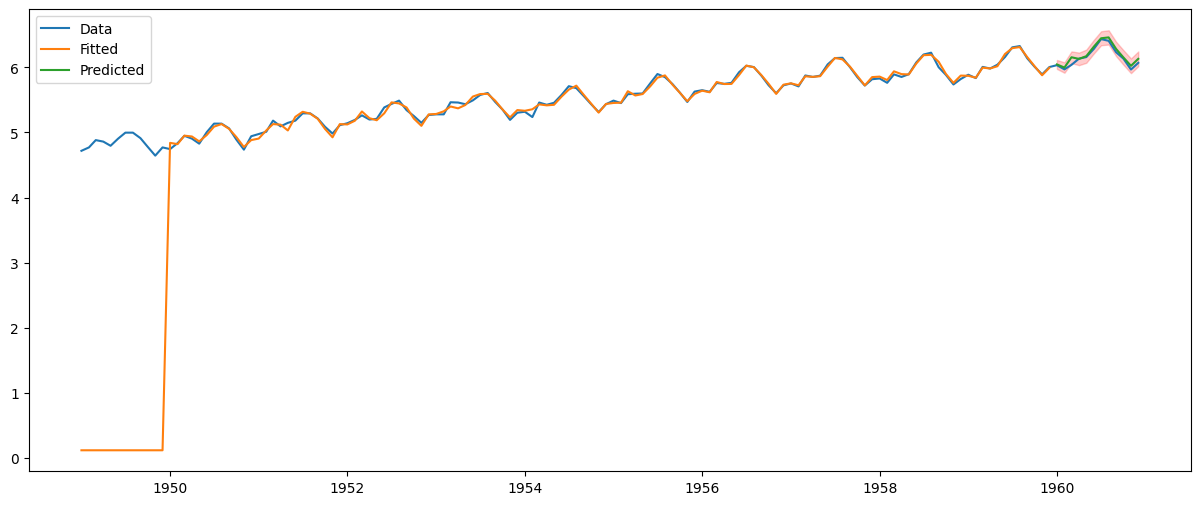

In [ ]:
log_train_pred = logmodel.predict_in_sample(start=0, end=-1)

fig, ax = plt.subplots(figsize=(15,6))
ax.plot(df.index, df['LogPassengers'], label='Data')
ax.plot(train.index, log_train_pred, label='Fitted')
ax.plot(test.index, log_pred, label= "Predicted")
ax.fill_between(test.index, log_confint[:,0], log_confint[:,1], color='red', alpha=0.2)
ax.legend()
plt.show();

##### Now let's check whether the MA(1), for seasonal and AR(2) for non seasonal work with acf and pacf plots

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

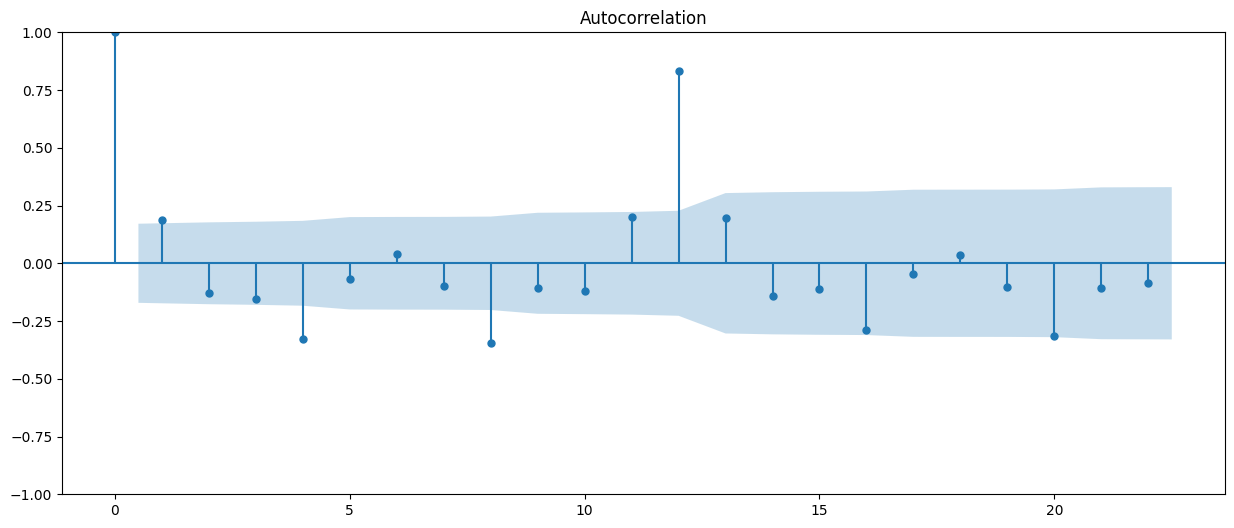

In [ ]:
fig, ax = plt.subplots(figsize=(15,6))
plot_acf(df['Passengers'], ax=ax)
plt.show();

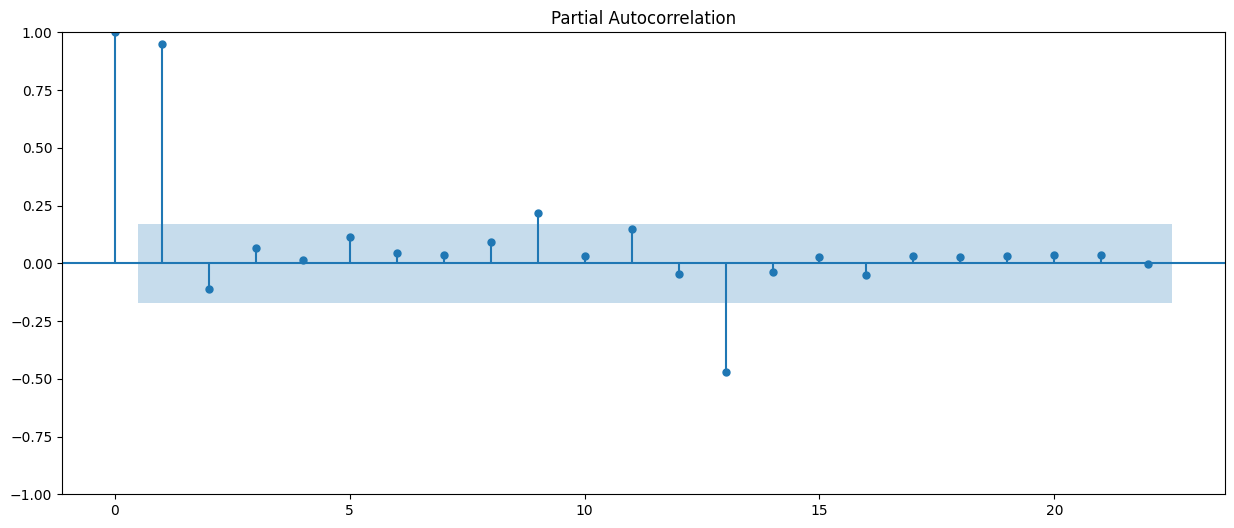

In [ ]:
fig, ax = plt.subplots(figsize=(15,6))
plot_pacf(train['LogPassengers'], ax=ax)
plt.show();

##### Now, let's check the RMSE of both

In [ ]:
def rmse(t, y):
  return np.sqrt(np.mean((t-y)**2))

In [ ]:
print("Non-Logged RMSE: ", rmse(test['Passengers'], pred))
print("Logged RMSE: ", rmse(test['Passengers'], np.exp(log_pred)))

Non-Logged RMSE:  18.536468798006823
Logged RMSE:  23.06076576973839


##### Now, check the model, that I think can be better on basis of PACF and ACF Plots

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
sarimax_model = SARIMAX(train['Passengers'], order=(2,0,0), seasonal_order=(0,1,1,12))
result = sarimax_model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optim

In [ ]:
pred = result.forecast(N_test)

In [ ]:
# Finding RMSE now
error = rmse(test['Passengers'], pred)
print("RMSE: ", error)

RMSE:  17.11105961798682
